### Problem Statement

Heart disease is one of the leading causes of death globally. Early detection and accurate diagnosis of heart disease can greatly improve patient outcomes and prevent mortality. The Heart Disease Analysis dataset contains various clinical parameters of patients and whether or not they have heart disease. The problem is to develop a predictive model that can accurately classify patients as having heart disease or not based on the given features.

The Heart Disease Analysis dataset is a valuable resource for researchers, healthcare providers, and data analysts who are interested in studying heart disease and developing accurate predictive models. By analyzing this dataset, we can identify the most important risk factors for heart disease and develop screening tools to detect early signs of the disease.

### Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Heart_disease_details.csv')

In [3]:
df.head(5)

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
0,Jane Doe,Female,55,1,1,1,140,90,100,1,...,Shows a 50% blockage in the left anterior desc...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,Mark Johnson,Male,57,1,1,1,150,80,110,1,...,Shows a 60% blockage in the right coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"
2,Emily Davis,Female,60,1,1,1,130,85,95,1,...,Shows a 75% blockage in the left anterior desc...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, lisinopril, rosuvastatin","Angioplasty,Coronary artery bypass surgery"
3,William Thompson,Male,62,1,1,1,145,90,100,1,...,Shows a 80% blockage in the left circumflex co...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
4,Ashley Johnson,Female,58,1,1,1,135,80,105,1,...,Shows a 90% blockage in the right coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, simvastatin, lisinopril","Angioplasty,Coronary artery bypass surgery"


### Pre-Processing

In [4]:
df.shape

(334, 49)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 49 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Name                                             334 non-null    object
 1   Gender                                           334 non-null    object
 2   Age                                              334 non-null    int64 
 3   Chest pain                                       334 non-null    int64 
 4   Shortness of breath                              334 non-null    int64 
 5   Fatigue                                          334 non-null    int64 
 6   Systolic                                         334 non-null    int64 
 7   Diastolic                                        334 non-null    int64 
 8   Heart rate (bpm)                                 334 non-null    int64 
 9   Lung sounds                                

In [6]:
df.describe()

,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),...,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Obesity,Murmur
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,50.149701,0.880240,0.826347,0.979042,133.098802,83.203593,101.152695,0.859281,213.637725,136.916168,...,0.173653,0.137725,0.002994,0.553892,0.086826,0.122754,0.350299,0.586826,0.056886,0.458084
std,15.151935,0.325168,0.379379,0.143459,10.040121,6.947282,11.667466,0.348253,26.169645,24.484085,...,0.379379,0.345128,0.054718,0.497833,0.282003,0.328648,0.477779,0.493142,0.231973,0.498987
min,23.000000,0.000000,0.000000,0.000000,110.000000,70.000000,60.000000,0.000000,150.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,1.000000,130.000000,80.000000,96.250000,1.000000,200.000000,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,1.000000,130.000000,80.000000,100.000000,1.000000,210.000000,130.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.500000,1.000000,1.000000,1.000000,140.000000,90.000000,110.000000,1.000000,230.000000,150.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,160.000000,110.000000,120.000000,1.000000,310.000000,240.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df['Medications'].value_counts()

Warfarin, lisinopril, diuretic                                                                      38
Ibuprofen, colchicine, prednisone                                                                   22
Vancomycin, gentamicin                                                                              16
Penicillin, gentamicin                                                                              13
Ibuprofen, colchicine, prednisone, ACE inhibitors                                                   12
                                                                                                    ..
Sildenafil, bosentan, epoprostenol, treprostinil, iloprost, oxygen therapy, lung transplantation     1
Aspirin, metoprolol, simvastatin                                                                     1
Sildenafil, bosentan, bronchodilators                                                                1
Clopidogrel, lisinopril, rosuvastatin                                    

In [8]:
df.isnull().sum()

Name                                               0
Gender                                             0
Age                                                0
Chest pain                                         0
Shortness of breath                                0
Fatigue                                            0
Systolic                                           0
Diastolic                                          0
Heart rate (bpm)                                   0
Lung sounds                                        0
Cholesterol level (mg/dL)                          0
LDL level (mg/dL)                                  0
HDL level (mg/dL)                                  0
Diabetes                                           0
Atrial fibrillation                                0
Mitral valve prolapse                              0
Rheumatic fever                                    0
Mitral stenosis                                    0
Aortic stenosis                               

In [9]:
#detecting outliers
outlier_percents = {}
for column in df.columns:
    if df[column].dtype != object:
        q1 = np.quantile(df[column], 0.25)
        q3 = np.quantile(df[column], 0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)][column]
        outlier_percentage = len(outliers) / len(df[column]) * 100
        outlier_percents[column] = outlier_percentage
        outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
        print(outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False))

     Outlier_percentage
Age            0.598802
            Outlier_percentage
Chest pain           11.976048
Age                   0.598802
                     Outlier_percentage
Shortness of breath           17.365269
Chest pain                    11.976048
Age                            0.598802
                     Outlier_percentage
Shortness of breath           17.365269
Chest pain                    11.976048
Fatigue                        2.095808
Age                            0.598802
                     Outlier_percentage
Shortness of breath           17.365269
Chest pain                    11.976048
Systolic                       3.592814
Fatigue                        2.095808
Age                            0.598802
                     Outlier_percentage
Shortness of breath           17.365269
Chest pain                    11.976048
Systolic                       3.592814
Fatigue                        2.095808
Diastolic                      1.197605
Age                

                                                 Outlier_percentage
Fever                                                     20.359281
Shortness of breath                                       17.365269
Chills                                                    17.365269
Lung sounds                                               14.071856
Joint pain                                                13.772455
Dizziness                                                 12.275449
Chest pain                                                11.976048
Fainting                                                   8.682635
Drug use                                                   4.191617
Cholesterol level (mg/dL)                                  3.892216
Systolic                                                   3.592814
Restrictive cardiomyopathy                                 2.994012
Arrhythmogenic right ventricular cardiomyopathy            2.994012
Takotsubo cardiomyopathy                        

In [10]:
#removing outliers
threshold = 10
for column, outlier_percentage in outlier_percents.items():
    if outlier_percentage > threshold:
        q1 = np.quantile(df[column], 0.25)
        q3 = np.quantile(df[column], 0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        df = df[(df[column] <= upper_bound) & (df[column] >= lower_bound)]

# Print the cleaned DataFrame
df.head()

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
0,Jane Doe,Female,55,1,1,1,140,90,100,1,...,Shows a 50% blockage in the left anterior desc...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,Mark Johnson,Male,57,1,1,1,150,80,110,1,...,Shows a 60% blockage in the right coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"
2,Emily Davis,Female,60,1,1,1,130,85,95,1,...,Shows a 75% blockage in the left anterior desc...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, lisinopril, rosuvastatin","Angioplasty,Coronary artery bypass surgery"
3,William Thompson,Male,62,1,1,1,145,90,100,1,...,Shows a 80% blockage in the left circumflex co...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
4,Ashley Johnson,Female,58,1,1,1,135,80,105,1,...,Shows a 90% blockage in the right coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, simvastatin, lisinopril","Angioplasty,Coronary artery bypass surgery"


In [11]:
#detecting outliers after cleaning you can clearly see the difference
outlier_percents = {}
for column in df.columns:
    if df[column].dtype != object:
        q1 = np.quantile(df[column], 0.25)
        q3 = np.quantile(df[column], 0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)][column]
        outlier_percentage = len(outliers) / len(df[column]) * 100
        outlier_percents[column] = outlier_percentage
        outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
        print(outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False))

     Outlier_percentage
Age            0.719424
            Outlier_percentage
Age                   0.719424
Chest pain            0.000000
                     Outlier_percentage
Age                            0.719424
Chest pain                     0.000000
Shortness of breath            0.000000
                     Outlier_percentage
Fatigue                        1.438849
Age                            0.719424
Chest pain                     0.000000
Shortness of breath            0.000000
                     Outlier_percentage
Fatigue                        1.438849
Age                            0.719424
Chest pain                     0.000000
Shortness of breath            0.000000
Systolic                       0.000000
                     Outlier_percentage
Fatigue                        1.438849
Age                            0.719424
Chest pain                     0.000000
Shortness of breath            0.000000
Systolic                       0.000000
Diastolic          

                                                 Outlier_percentage
HDL level (mg/dL)                                         10.791367
LDL level (mg/dL)                                          9.352518
Pulmonary stenosis                                         7.194245
Tricuspid stenosis                                         7.194245
Aortic stenosis                                            7.194245
Mitral stenosis                                            5.755396
Dilated cardiomyopathy                                     5.755396
Rheumatic fever                                            5.035971
Mitral valve prolapse                                      5.035971
Takotsubo cardiomyopathy                                   4.316547
Arrhythmogenic right ventricular cardiomyopathy            3.597122
Restrictive cardiomyopathy                                 2.877698
Hypertrophic cardiomyopathy                                2.158273
Fatigue                                         

In [12]:
#Name column is not important for processing so dropping it
df.drop('Name', axis = 1, inplace = True)

In [13]:
df.shape

(139, 48)

In [14]:
#Now we are going to combine rare values in data set and converting them into one single catagory
#since all of them as separete entity are not that much important
def combine_rare_categories(df, column, threshold, new_category):
    # Calculate the frequency of each category in the column
    column_freq = df[column].value_counts(normalize=True)

    # Identify the rare categories
    rare_categories = column_freq[column_freq < threshold].index.tolist()

    # Replace the rare categories with a new category name
    df[column] = df[column].replace(rare_categories, new_category)

    return df

In [15]:
mode1 = df['Medications'].mode()[0]
mode2 = df['Cardiac CT'].mode()[0]
mode3 = df['EKG'].mode()[0]
mode4 = df['Treatment'].mode()[0]
mode5 = df['Blood culture'].mode()[0]
df = combine_rare_categories(df, 'Medications', 0.05, mode1)
df = combine_rare_categories(df, 'Cardiac CT', 0.05, mode2)
df = combine_rare_categories(df, 'EKG', 0.05, mode3)
df = combine_rare_categories(df, 'Treatment', 0.05, mode4)
df = combine_rare_categories(df, 'Blood culture', 0.05, mode5)

In [16]:
df['Medications'].value_counts()

Warfarin, lisinopril, diuretic             122
Ibuprofen, colchicine, prednisone            9
ACE inhibitors, beta-blockers, diuretic      8
Name: Medications, dtype: int64

In [17]:
import re
for col in df.columns:
    if df[col].dtype==object:
        unkn_count = df[col].str.count(re.escape("None")).sum()
        print(f"Column {col}: {unkn_count} 'None' value")

Column Gender: 0 'None' value
Column Echocardiogram: 132 'None' value
Column Blood culture: 139 'None' value
Column EKG: 0 'None' value
Column Cardiac CT: 7 'None' value
Column Chest x-ray: 133 'None' value
Column Previous illnesses: 139 'None' value
Column Pulmonary function tests: 133 'None' value
Column Spirometry: 139 'None' value
Column Diagnosis: 0 'None' value
Column Medications: 0 'None' value
Column Treatment: 0 'None' value


### Data Insights

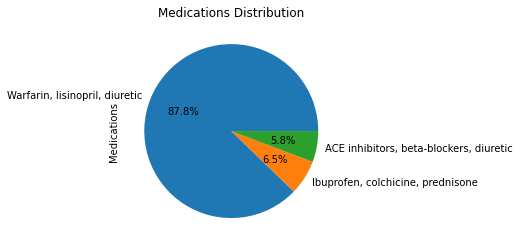

In [18]:
# Group the data by the "Medications" column
medications_counts = df['Medications'].value_counts()
medications_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Medications Distribution')
plt.show()

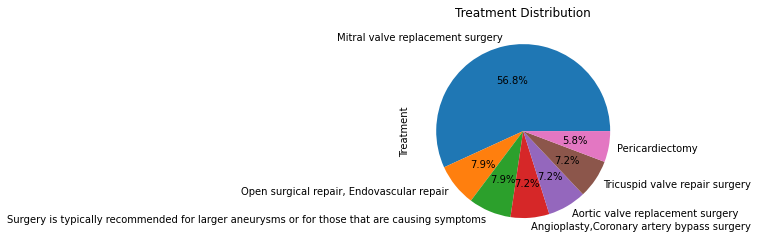

In [19]:
# Group the data by the "Treatment" column
treatment_counts = df['Treatment'].value_counts()
treatment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Treatment Distribution')
plt.show()

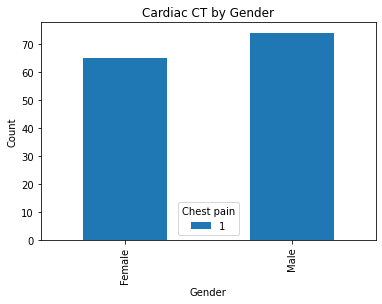

In [20]:
ct_counts = df.groupby(['Gender', 'Chest pain']).size().unstack()
# Plot a bar graph of the Cardiac CT counts
ct_counts.plot(kind='bar')
# Set the title and labels of the plot
plt.title('Cardiac CT by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
# Show the plot
plt.show()

In [21]:
def plots(df, variable):
  if df[variable].dtype != object:
    # define figure size
    fig, ax = plt.subplots(1, 2, figsize=(24, 4))
    
    # histogram
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')
    
    # KDE plot
    sns.kdeplot(df[variable], ax=ax[1])
    ax[1].set_title('KDE Plot')
    
    
    plt.tight_layout()
    plt.show()

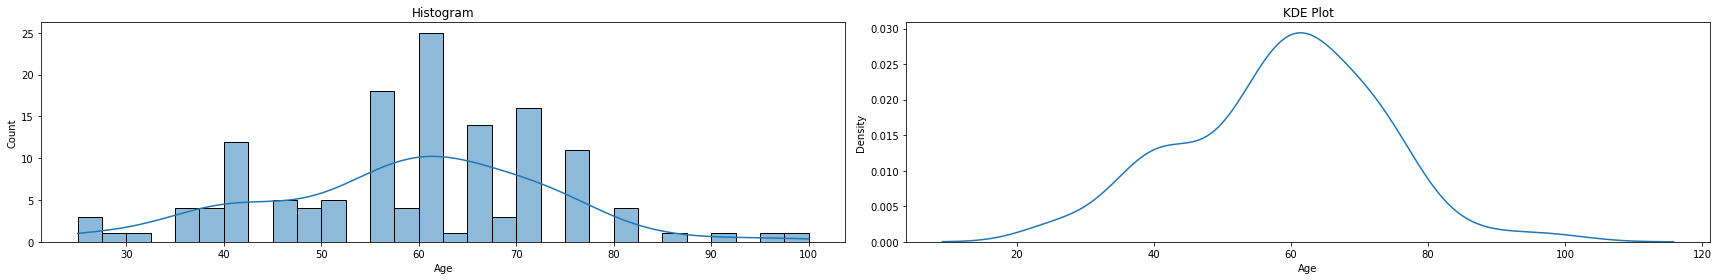

In [22]:
plots(df, 'Age')

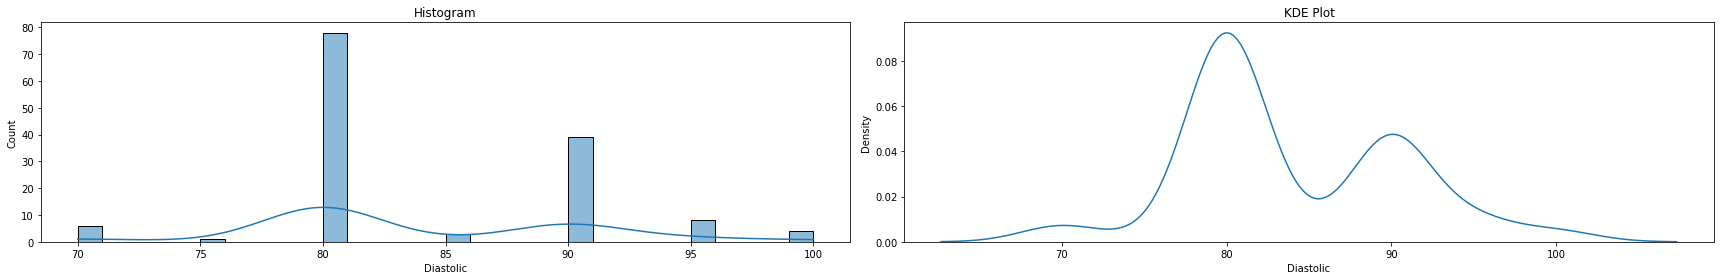

In [23]:
plots(df, 'Diastolic')

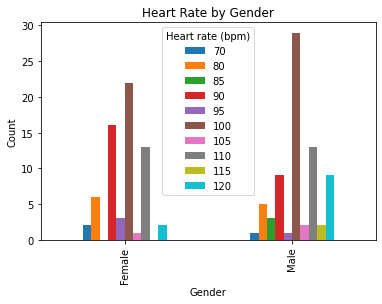

In [24]:
ct_counts = df.groupby(['Gender', 'Heart rate (bpm)']).size().unstack()
# Plot a bar graph of the Cardiac CT counts
ct_counts.plot(kind='bar')
# Set the title and labels of the plot
plt.title('Heart Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
# Show the plot
plt.show()

### Model Creation

In [25]:
df_onehot = pd.get_dummies(df, columns=['Cardiac CT', 'Echocardiogram', 'Blood culture', 'Chest x-ray', 'Previous illnesses', 'Pulmonary function tests', 'Spirometry'])

In [26]:
df_onehot.head()

,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),...,Echocardiogram_Shows thickening of the pericardium,Blood culture_None,Chest x-ray_None,Chest x-ray_Shows increased vascular markings and signs of chronic changes in the lungs,Chest x-ray_Shows increased vascular markings in the lungs,Previous illnesses_None,Pulmonary function tests_None,Pulmonary function tests_Shows decreased lung capacity,Pulmonary function tests_Shows decreased lung capacity and reduced diffusing capacity of the lung for carbon monoxide,Spirometry_None
0,Female,55,1,1,1,140,90,100,1,220,...,0,1,1,0,0,1,1,0,0,1
1,Male,57,1,1,1,150,80,110,1,210,...,0,1,1,0,0,1,1,0,0,1
2,Female,60,1,1,1,130,85,95,1,230,...,0,1,1,0,0,1,1,0,0,1
3,Male,62,1,1,1,145,90,100,1,240,...,0,1,1,0,0,1,1,0,0,1
4,Female,58,1,1,1,135,80,105,1,220,...,0,1,1,0,0,1,1,0,0,1


In [27]:
X = df_onehot.drop(['Diagnosis', 'Gender'], axis = 1)
y = df_onehot['Diagnosis']

In [28]:
X_encode = pd.get_dummies(X)

In [29]:
X_encode.shape

(139, 69)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size=0.3, random_state=42)

# Initialize the decision tree classifier object
clf = DecisionTreeClassifier()

# Fit the training data into the classifier
clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size=0.3, random_state=42)

# Initialize the random forest classifier object
clf = RandomForestClassifier(n_estimators=100)

# Fit the training data into the classifier
clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

# Print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8809523809523809


### Accuracy Scores

In [33]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score

# Define the decision tree classifier object
clf = DecisionTreeClassifier()

# Initialize the ShuffleSplit object
ss = ShuffleSplit(n_splits=20, test_size=0.3, random_state=42)

# Initialize an empty list to store the accuracy scores
scores = []

# Iterate over the training and testing indices generated by ShuffleSplit
for train_index, test_index in ss.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X_encode.iloc[train_index], X_encode.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the training data into the classifier
    clf.fit(X_train, y_train)
    
    # Predict the target variable for the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy score and append to the scores list
    scores.append(accuracy_score(y_test, y_pred))

# Print the accuracy scores
print("Accuracy Scores:", scores[np.argmax(scores)]*100)

Accuracy Scores: 97.61904761904762
